In [1]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
%matplotlib inline
import seaborn as sns

import sys,os,pdb,copy,pickle
from importlib import reload
import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp
import database
db = database.db

import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

from scipy.ndimage import gaussian_filter1d
import sklearn
from sklearn.decomposition import PCA,SparsePCA,MiniBatchSparsePCA

import animate_helper as ah
reload(ah)

67 sessions!
67 sessions!


<module 'animate_helper' from '/mnt/home/szheng/projects/util_code/animate_helper.py'>

In [2]:
sys.path.append('/mnt/home/szheng/projects/')
import wishart_process as wp

In [5]:
reload(dpp)

<module 'data_prep_pyn' from '/mnt/home/szheng/projects/util_code/data_prep_pyn.py'>

In [3]:
# data_dir_full = '/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/'
data_dir_full = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)['data_dir_full'][0] #0
print(data_dir_full)
# load data
mat_to_return=prep.load_stuff(data_dir_full,sessionPulses='*SessionPulses.Events.mat')
# sessionPulses=mat_to_return['sessionPulses']
# filtered = mat_to_return['filtered']
behavior=mat_to_return['behavior']
# ripples = mat_to_return['ripples']
cell_metrics = mat_to_return['cell_metrics']

prep_res = dpp.load_spk_beh_df(data_dir_full,force_reload=False,extra_load={})
spk_beh_df=prep_res['spk_beh_df']
_,spk_beh_df = dpp.group_into_trialtype(spk_beh_df)
spk_beh_df,_=dpp.add_lin_binned(spk_beh_df,nbins=100)
cell_cols_d = prep_res['cell_cols_d']
beh_df = prep_res['beh_df']
beh_df_d,beh_df=dpp.group_into_trialtype(beh_df)
spike_trains = prep_res['spike_trains']


/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


load *SessionPulses.Events.mat failed


In [4]:
reload(pf)
reload(pa)
cell_cols = cell_cols_d['pyr']
speed_key = 'speed_kalman'
fr_map_d,_,_ = pf.ratemap_from_spk_beh_df_alltrialtype(spk_beh_df,cell_cols_d['pyr'],speed_thresh=1,bin_size=2.2,smth_in_bin=2.5,speed_key=speed_key)
fr_map_dict=pa.get_fr_map_trial(spk_beh_df,cell_cols,trialtype_key='trial_type',speed_thresh=1.,order=['smooth','divide'],speed_key=speed_key)
fr_map_trial_d = {k:val[0] for k,val in fr_map_dict.items()}
fr_map_trial_df_d=pd.concat({k:pf.fr_map_trial_to_df(fr_map_trial_d[k],cell_cols) for k in fr_map_dict.keys()},axis=0)


cant format into a dataframe
cant format into a dataframe


In [5]:
import pca_analysis as pcaa
# preprocessing
task_ind,tt_ind = 0,0
fr_map_trial = fr_map_trial_d[task_ind,tt_ind]
reload(pcaa)
fr_map_trial_centered_normed_df,fr_map_trial_centered_normed = pcaa.preprocess_fr_map_trial(fr_map_trial,cell_cols)
X_l=pcaa.prep_X_l(fr_map_trial_centered_normed)

In [6]:
import sys
sys.path.append('/mnt/home/szheng/projects/wishart_process')
import visualizations
import models
import inference
import jax.numpy as jnp
import jax
from numpyro import optim
import evaluation
import numpyro

2023-04-21 09:52:15.373005: E external/xla/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


2023-04-20 15:28:59.308271: E external/xla/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
/mnt/home/szheng/projects/wishart_process/visualizations.py:35: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(X, Y, Z, 0,colors=colors,linewidth=line_width)


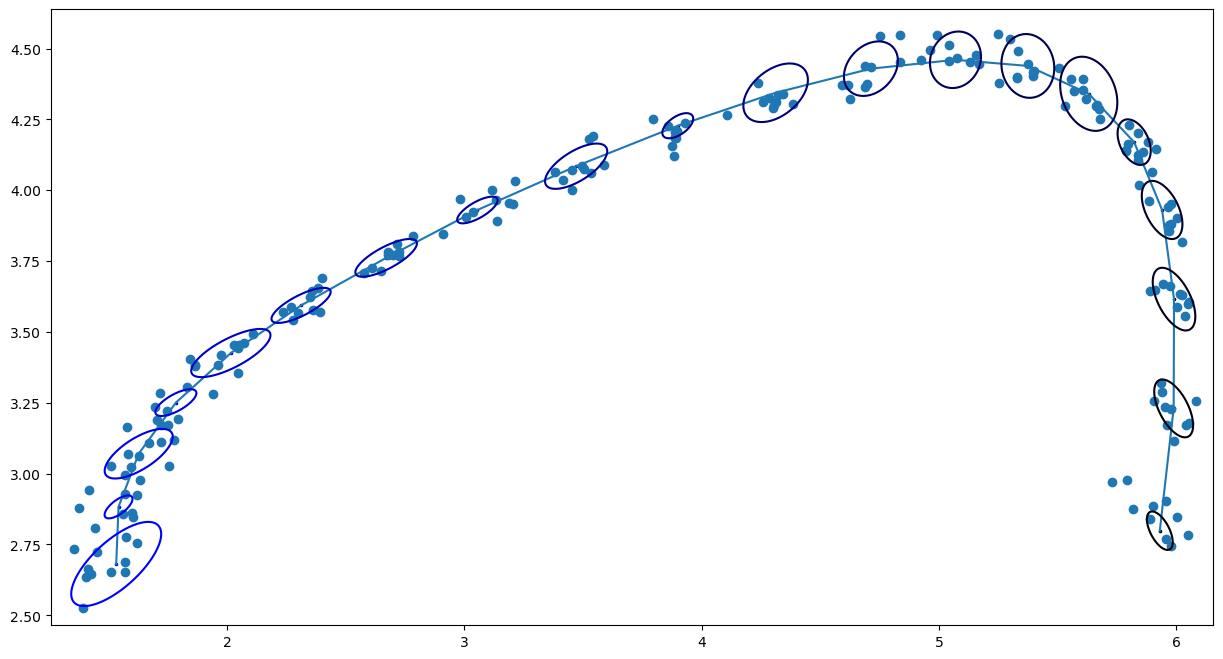

/mnt/home/szheng/projects/wishart_process/inference.py:21: UserWarning: Missing a plate statement for batch dimension -2 at site 'y'. You can use `numpyro.util.format_shapes` utility to check shapes at all sites of your model.
  svi_result = svi.run(key, n_iter, x, y)
  0%|          | 0/20000 [00:00<?, ?it/s]/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/jax/_src/linear_util.py:166: UserWarning: Missing a plate statement for batch dimension -2 at site 'y'. You can use `numpyro.util.format_shapes` utility to check shapes at all sites of your model.
  ans = self.f(*args, **dict(self.params, **kwargs))
100%|██████████| 20000/20000 [00:06<00:00, 3119.52it/s, init loss: 56679392.0000, avg. loss [19001-20000]: 1272.1434]


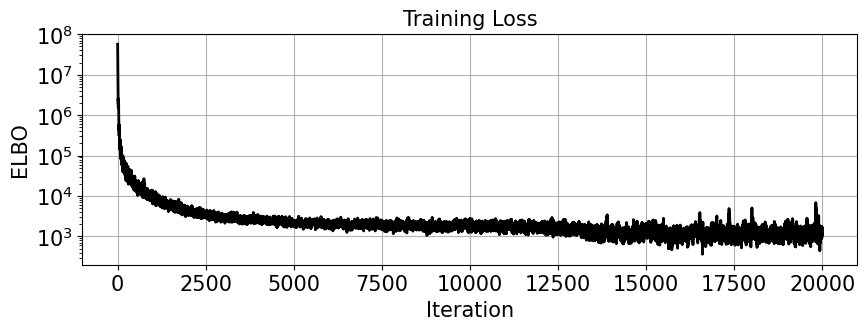

/mnt/home/szheng/projects/wishart_process/visualizations.py:35: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(X, Y, Z, 0,colors=colors,linewidth=line_width)


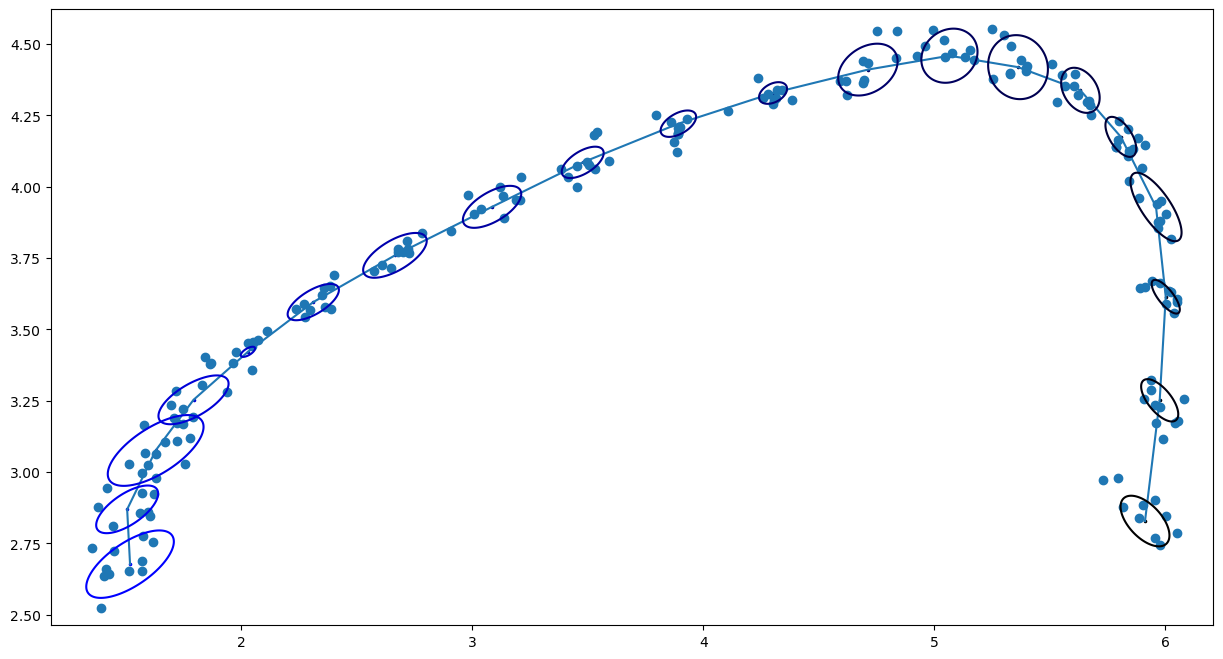

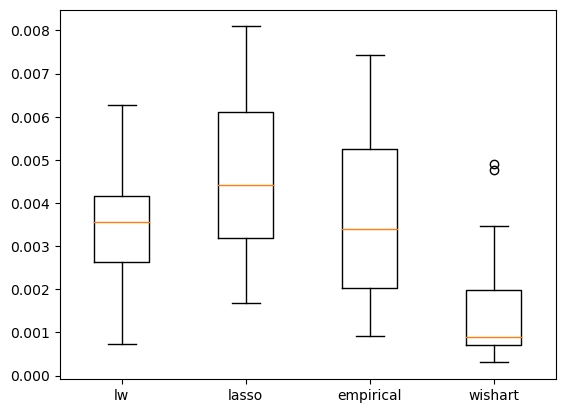

In [10]:


# %load_ext autoreload
# %autoreload 2

# %% Make a fake dataset
N = 20  # time points
D = 2
seed = 1
num_samples = 10

rng = [-10,10]

x = jnp.linspace(rng[0], rng[1], N)
sigma_m = 10.
sigma_c = 10.

# Prior
kernel_gp = lambda x, y: 1e1*(1e-6*(x==y)+jnp.exp(-jnp.linalg.norm(x-y)**2/(2*sigma_m**2)))
kernel_wp = lambda x, y: 1e-6*(x==y)+jnp.exp(-jnp.linalg.norm(x-y)**2/(2*sigma_c**2))

gp = models.GaussianProcess(kernel=kernel_gp,num_dims=D)
wp = models.WishartProcess(kernel=kernel_wp,nu=D+1,V=1e-2*jnp.eye(D))

# Likelihood
likelihood = models.NormalConditionalLikelihood()

with numpyro.handlers.seed(rng_seed=seed):
    mu = gp.sample(x)
    sigma = wp.sample(x)
    y = jnp.stack([likelihood.sample(mu,sigma,ind=jnp.arange(len(mu))) for i in range(num_samples)])

visualizations.visualize_pc(
    mu[:,None],sigma,pc=y.reshape(y.shape[0]*y.shape[1],-1)
)

# %% Joint
joint = models.JointGaussianWishartProcess(gp,wp,likelihood) 

# %% Inference
varfam = inference.VariationalNormal(joint.model)

adam = optim.Adam(1e-1)
key = jax.random.PRNGKey(seed)
varfam.infer(adam,x,y,n_iter=20000,key=key)

# %% Visualization
visualizations.plot_loss(
    [varfam.losses],xlabel='Iteration',ylabel='ELBO',titlestr='Training Loss',colors=['k'],
)

# %%
with numpyro.handlers.seed(rng_seed=seed):
    _,mu_hat,sigma_hat = varfam.sample()

visualizations.visualize_pc(
    mu_hat[:,None],sigma_hat,pc=y.reshape(y.shape[0]*y.shape[1],-1)
)
# %% Evaluation

compared = evaluation.compare(y)
compared['wishart'] = sigma_hat.transpose(1,2,0)
performance = evaluation.evaluate(compared,sigma.transpose(1,2,0))

visualizations.plot_box(performance)


In [17]:
y.shape

(10, 20, 2)

# sim place data

In [7]:
import pca_analysis as pcaa

task_ind,tt_ind = 0,1
fr_map_trial_original=fr_map_trial_d[task_ind,tt_ind]
fr_map_trial_mean = fr_map_trial_original.mean(axis=(-1))
fr_map_trial_sim = fr_map_trial_mean[:,:,None] * (1+np.arange(fr_map_trial_original.shape[-1])) / (fr_map_trial_original.shape[-1] / 1.5)

task_ind,tt_ind = 0,1
fr_map_trial = fr_map_trial_sim#fr_map_trial_d[task_ind,tt_ind]#fr_map_trial_all#
reload(pcaa)
fr_map_trial_centered_normed_df,fr_map_trial_centered_normed = pcaa.preprocess_fr_map_trial(fr_map_trial,cell_cols)
X_l=pcaa.prep_X_l(fr_map_trial_centered_normed)

# fr_map_trial_sim_centered=fr_map_trial_sim - fr_map_trial_sim.mean(axis=-1,keepdims=True)
# X_l = fr_map_trial_sim_centered.swapaxes(0,1)

In [21]:
X_l.swapaxes(1,2).swapaxes(0,1).shape

(37, 100, 422)

In [53]:
fr_map_trial.shape

(422, 100, 37)

In [8]:
n_pos = X_l.shape[0]
x = jnp.arange(n_pos)
y = X_l.swapaxes(1,2).swapaxes(0,1)  # n_trial x n_time x n_dim
y = jnp.array(y[:,:,::])

y = jnp.array(fr_map_trial.swapaxes(1,2).swapaxes(0,1).swapaxes(1,2))
n_trial,n_pos,n_neuron = y.shape

In [9]:
fr_map_trial.shape

(422, 100, 37)

In [10]:
X_l.shape

(100, 422, 37)

In [11]:
y.shape

(37, 100, 422)

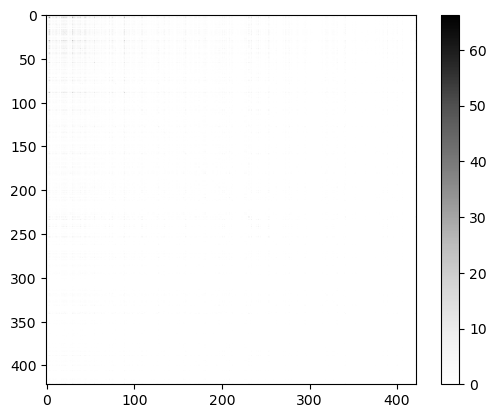

In [12]:
y.shape
y.max()
empirical = jnp.cov((y - y.mean(0)[None]).reshape(y.shape[0]*y.shape[1],y.shape[2]).T)
plt.imshow(empirical)
plt.colorbar()
plt.show()

In [64]:
y.mean()

Array(0.9104982, dtype=float32)

In [14]:
# Prior
sigma_m = 2.
sigma_c = 2.
kernel_gp = lambda x, y: 1e0*(1e-3*(x==y)+jnp.exp(-jnp.linalg.norm((x-y)%n_pos)**2/(2*sigma_m**2)))
kernel_wp = lambda x, y: 1e0*(1e-3*(x==y)+jnp.exp(-jnp.linalg.norm((x-y)%n_pos)**2/(2*sigma_c**2)))

D = 500

empirical = jnp.cov((y - y.mean(0)[None]).reshape(y.shape[0]*y.shape[1],y.shape[2]).T)

gp = models.GaussianProcess(kernel=kernel_gp,num_dims=n_neuron)
wp = models.WishartProcess(kernel=kernel_wp,nu=D+1,V=empirical)


# Likelihood
likelihood = models.NormalConditionalLikelihood()

# %% Joint
joint = models.JointGaussianWishartProcess(gp,wp,likelihood) 

# %% Inference
varfam = inference.VariationalNormal(
    joint.model,init={'G':y.mean(0).T[:,None]}
)

adam = optim.Adam(1e-3)
seed = 1
key = jax.random.PRNGKey(seed)
varfam.infer(adam,x,y,n_iter=20000,key=key)


XlaRuntimeError: INTERNAL: cuSolver internal error

/mnt/home/szheng/projects/wishart_process/visualizations.py:35: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(X, Y, Z, 0,colors=colors,linewidth=line_width)


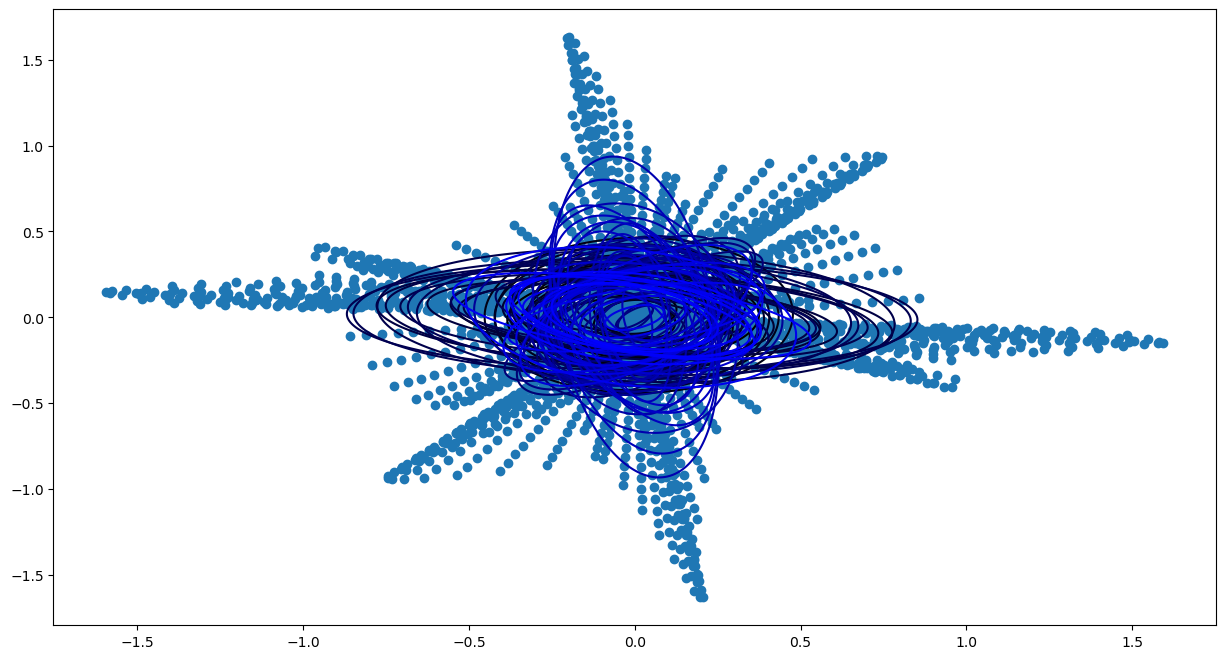

In [50]:
with numpyro.handlers.seed(rng_seed=seed):
    F,mu_hat,sigma_hat = varfam.sample()

# plt.imshow(np.abs(F).sum(1))
# plt.show()
# for i in range(10):
#     plt.imshow(F[i])
#     plt.show()
visualizations.visualize_pc(
    mu_hat[:,None],sigma_hat,pc=y.reshape(y.shape[0]*y.shape[1],-1)
)

In [54]:
F.shape

(100, 20, 41)